In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
imbalance_data=pd.read_csv('/content/imbalanced_data.csv')
raw_data=pd.read_csv('/content/raw_data.csv')

In [73]:
raw_data.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [74]:
imbalance_data.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

<Axes: xlabel='label', ylabel='count'>

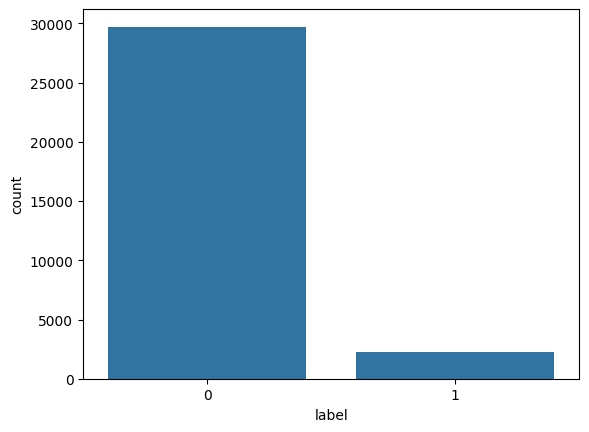

In [75]:
sns.countplot(x='label',data=imbalance_data)

* 0 --> No Hate
* 1 --> Hate

In [76]:
imbalance_data.drop(['id'], axis=1, inplace=True)

In [77]:
raw_data.drop(['Unnamed: 0',	'count'	,'hate_speech',	'offensive_language',	'neither'], axis=1, inplace=True)

In [78]:
raw_data.head()

class                                              tweet
0      2  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

<Axes: xlabel='class', ylabel='count'>

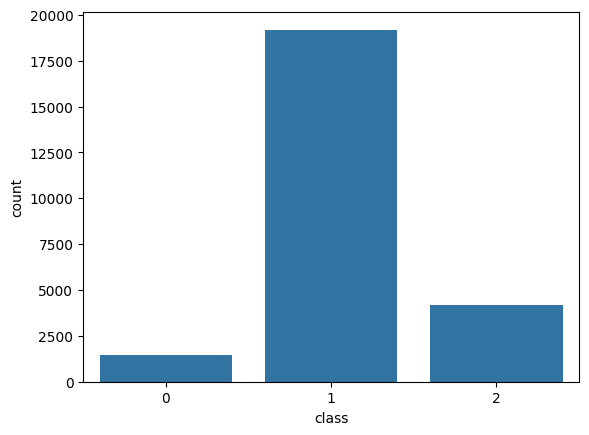

In [79]:
sns.countplot(x='class',data=raw_data)

* class 0: hate
* class 1: abusive
* class 2: no hate

In [80]:
# Let's copy values of the 1 class into  0 class
raw_data[raw_data['class'] == 0]['class'] = 1

In [81]:
raw_data['class'].unique()

array([2, 1, 0])

In [82]:
# replace the values 0 to 1
raw_data['class'].replace({0:1}, inplace=True)

In [83]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

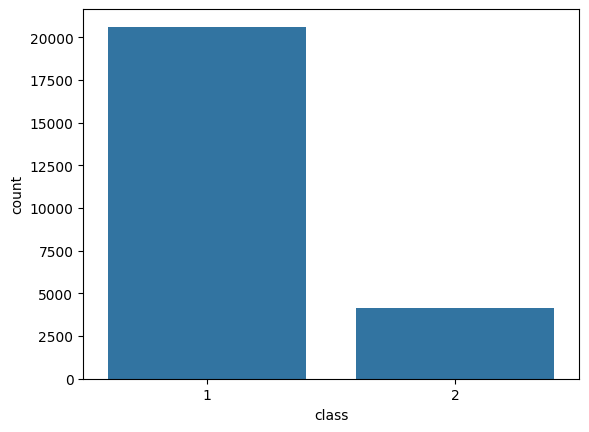

In [84]:
sns.countplot(x='class',data=raw_data)

In [85]:
# replace the values 2 to 0
raw_data['class'].replace({2:0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

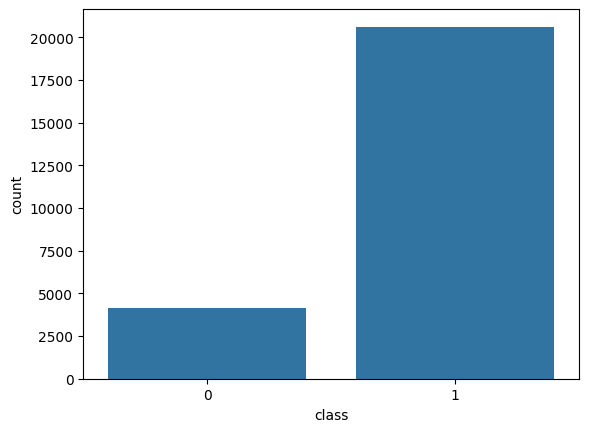

In [86]:
sns.countplot(x='class',data=raw_data)

<Axes: xlabel='label', ylabel='count'>

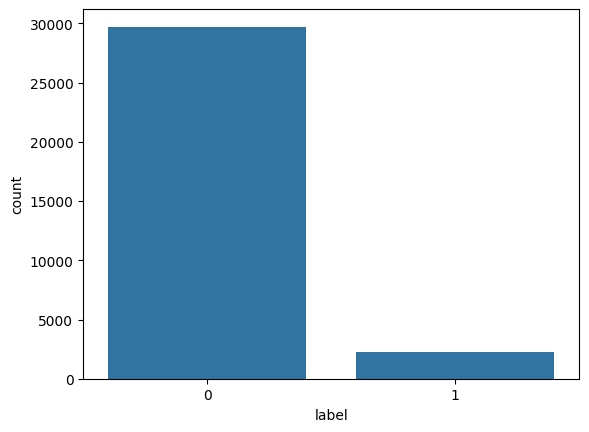

In [87]:
sns.countplot(x='label', data=imbalance_data)

In [88]:
#Let's change the name of the 'class' into label
raw_data.rename(columns={'class':'label'}, inplace=True)

In [89]:
raw_data.head()

label                                              tweet
0      0  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [90]:
# let's concate both the data into single data fram
df=pd.concat([raw_data,imbalance_data])

In [91]:
df.shape

(56745, 2)

<Axes: xlabel='label', ylabel='count'>

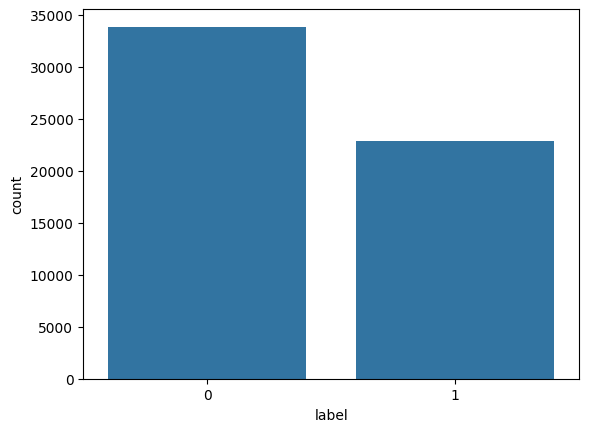

In [92]:
sns.countplot(x='label', data=df)


# Preprocessing

In [93]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
# let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))

In [95]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [96]:
# let's apply data_cleaning on the data
df['tweet'] = df['tweet'].apply(data_cleaning)

In [97]:
df['tweet'][0]

0     rt mayasolovely as a woman you shouldnt compl...
0     user when a father is dysfunctional and is so...
Name: tweet, dtype: object

In [98]:
x= df['tweet']
y= df['label']

In [99]:
x

0         rt mayasolovely as a woman you shouldnt compl...
1         rt  boy dats coldtyga dwn bad for cuffin dat ...
2         rt urkindofbrand dawg rt  you ever fuck a bit...
3         rt cganderson vivabased she look like a trann...
4         rt shenikaroberts the shit you hear about me ...
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961    thank you user for you follow   thank you user...
Name: tweet, Length: 56745, dtype: object

In [100]:
from sklearn.model_selection import train_test_split


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
print(x_trian.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(45396,)
(11349,)
(11349,)
(45396,)


# Feature Engineering

In [108]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [109]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [110]:
sequences_matrix

array([[  183, 12055,   243, ...,  9042,  7897,  8679],
       [    0,     0,     0, ..., 42779, 42780, 42781],
       [11591,     1,    69, ...,    14,  5537,   529],
       ...,
       [    0,     0,     0, ...,  1294,  2891, 17038],
       [   17,   632,     9, ...,  1544,     3,   355],
       [   15,   121,   113, ...,     2,    17,  5091]], dtype=int32)

In [111]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [112]:

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [114]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

284/284 [==============================] - 318s 1s/step - loss: 0.2737 - accuracy: 0.8918 - val_loss: 0.1966 - val_accuracy: 0.9360


In [116]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [117]:

# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

355/355 [==============================] - 37s 105ms/step - loss: 0.1960 - accuracy: 0.9340


In [119]:
lstm_prediction = model.predict(test_sequences_matrix)

355/355 [==============================] - 42s 117ms/step


In [120]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
print(confusion_matrix(y_test,res))

[[6526  272]
 [ 477 4074]]


In [123]:
print(confusion_matrix(y_test,res))

[[6526  272]
 [ 477 4074]]


In [124]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [125]:
# Let's save the mdoel.
model.save("model.h5")

In [129]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

i love this movie
i love this movie
['love movi']
[[28, 5811]]
1/1 [==============================] - 0s 142ms/step
pred [[0.17613976]]
no hate
